In [ ]:
# Import functions and libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy

from skimage import io

from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
import matplotlib.pylab as pylab
file_path = "https://links.uwaterloo.ca/Repository/TIF/lena1.tif"

%matplotlib inline

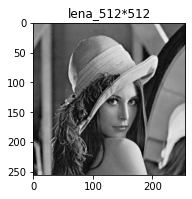

In [ ]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

lena = io.imread(file_path, True)
# lena50 = cv2.imread("C:\lena50.jpg",0)
plt.subplot(121),plt.imshow(lena,'gray'),plt.title('lena_512*512')
# plt.subplot(122),plt.imshow(lena50,'gray'),plt.title('lena_50*50')
plt.show()

In [ ]:
def dft(input_img):
    rows = input_img.shape[0]
    cols = input_img.shape[1]
    output_img = np.zeros((rows,cols),complex)
    for m in range(0,rows):
        for n in range(0,cols):
            for x in range(0,rows):
                for y in range(0,cols):
                    output_img[m][n] += input_img[x][y] * np.exp(-1j*2*math.pi*(m*x/rows+n*y/cols))
    return output_img

In [ ]:
%pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 5.1 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeRegressor
from mlxtend.data import boston_housing_data
from sklearn.model_selection import train_test_split


X, y = boston_housing_data()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True)



tree = DecisionTreeRegressor(random_state=123)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        tree, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 31.536
Average bias: 14.096
Average variance: 17.440


In [ ]:
#import all required libaries
from keras.datasets import cifar10 
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from keras.models import Model, Sequential 
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score

from keras.models import load_model 
from keras.losses import msle
import numpy as np # linear algebra
import matplotlib.pyplot as plt #visualization library


In [ ]:
#load training and test dataset  from cifar10 dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

# Unit normalizing 
X_train = X_train.astype('float32')/255 
X_test = X_test.astype('float32')/255 
Y_test = Y_test.astype('float32')/255 
img_rows=X_train[0].shape[0]
img_cols=X_test[0].shape[1]
print(X_train.shape[0],img_rows,img_cols)
# Reshaping training and test datasets
X_train = X_train.reshape(len(X_train),X_train.shape[1],X_train.shape[2],3) 
# X_test = X_test.reshape(len(X_test),X_test.shape[1],X_test.shape[2],1) 
print(X_train.shape) #(50000, 32, 32, 3)
print(X_test.shape) #(10000, 32, 32, 3)
print(Y_test.shape) #(10000, 1)
print(Y_train.shape)

170508288/170498071 [==============================] - 2s 0us/step
50000 32 32
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 1)
(50000, 1)


In [ ]:
# from keras.utils import to_categorical
# trainY = to_categorical(Y_train)
# testY = to_categorical(Y_test)

In [ ]:
def build_autoencoder(img_shape):
    # The encoder network
    encoder = Sequential()
    encoder.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=img_shape)) # 32x32x32
    encoder.add(BatchNormalization()) # 32x32x32
    encoder.add(MaxPooling2D(2, padding='same')) # 16x16x32
    encoder.add(Conv2D(16, kernel_size=3, strides=1, padding='same', activation='relu'))  # 16x16x16
    encoder.add(BatchNormalization())  # 16x16x16
    encoder.add(Conv2D(8, kernel_size=3, strides=1, padding='same', activation='relu')) # 16x16x8
    encoder.add(BatchNormalization()) # 16x16x8
    encoder.add(Conv2D(8, kernel_size=3, strides=1, padding='same', activation='relu')) # 16x16x8
    
    # The decoder network
    decoder = Sequential()
    decoder.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu')) # 16x16x32
    decoder.add(BatchNormalization()) # 16x16x32
    decoder.add(UpSampling2D()) # 32x32x32
    decoder.add(Conv2D(16, kernel_size=3, strides=2, padding='same', activation='relu')) # 16x16x16
    decoder.add(BatchNormalization()) # 16x16x16
    decoder.add(UpSampling2D()) # 32x32x16
    decoder.add(Conv2D(16, kernel_size=3, strides=1, padding='same', activation='relu')) # 32x32x16
    decoder.add(BatchNormalization()) # 32x32x16
    decoder.add(Conv2D(3,  kernel_size=1, strides=1, padding='same', activation='sigmoid')) # 32x32x3
    
    return encoder, decoder

In [ ]:
# IMG_SHAPE =  X_train.shape[1:] #(32, 32, 3)
IMG_SHAPE =  X_train.shape[1:] 
input_img = Input(shape=IMG_SHAPE) #create image input
encoder, decoder = build_autoencoder(IMG_SHAPE)
code = encoder(input_img) #encode image
reconstruction = decoder(code) #decoder image
autoencoder = Model(input_img,reconstruction) #create autoencoder model
autoencoder.compile(optimizer='adam', metrics=['accuracy'], loss='mean_squared_error') # compile model using adam optimizer and measure loss using mean_squared_error
print(encoder.summary())
print(decoder.summary())
print(autoencoder.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        4624      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 16)       64        
 hNormalization)                                                 
                                                        

In [ ]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', patience=200)

In [ ]:
# modelcheckpoint stores the weights best weights in a model with an interrval for futurue use
mc = ModelCheckpoint('auto_encoder_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
history = autoencoder.fit(x=X_train, y=X_train,
                validation_data=[X_test, X_test],  epochs=200, callbacks=[es, mc])
# history = autoencoder.fit(x=X_train, y=X_train,
#                 validation_data=[X_test, X_test], batch_size=32, epochs=100)

In [ ]:
autoencoder = load_model("best_model_sigma_1.h5")

In [ ]:
# calculate the accuracy of the model
decoded_imgs = autoencoder.predict(X_test)
_, acc  = autoencoder.evaluate(decoded_imgs, X_test, steps=10)
print('> %.3f' % (acc * 100.0))

10/10 [==============================] - 2s 135ms/step - loss: 0.0027 - accuracy: 0.8128
> 81.275


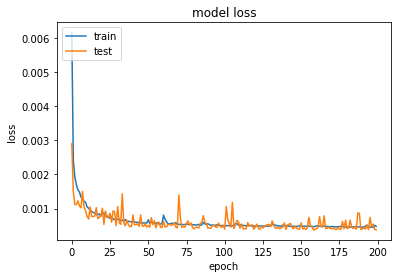

In [ ]:
# plot loss vs val_loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

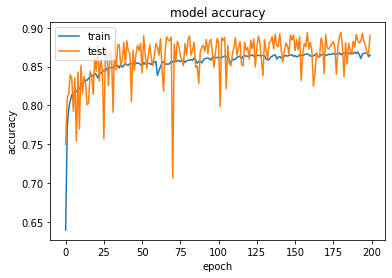

In [ ]:
#accuracy between train and test data  based on training results
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

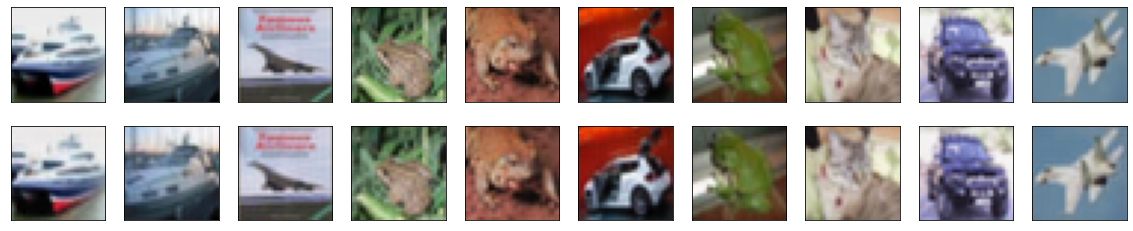

In [ ]:
#for 10 results based on the model
decoded_imgs = autoencoder.predict(X_test) 
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_test[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
#find thershold
def find_threshold(model, x_train_scaled):
  reconstructions = model.predict(x_train_scaled)
  # provides losses of individual instances
  reconstruction_errors = msle(reconstructions, x_train_scaled)
  # threshold for anomaly scores
  threshold = np.mean(reconstruction_errors.numpy()) \
      + np.std(reconstruction_errors.numpy())
  return threshold, reconstructions

In [ ]:
threshold, reconstructions = find_threshold(autoencoder, X_train)

In [ ]:
print(threshold)

0.0005532884


calculate the variance and bias

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 6.8 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


'0.20.0'

In [ ]:
import mlxtend
mlxtend.__version__

'0.20.0'

In [ ]:
from mlxtend.evaluate import bias_variance_decomp
import tensorflow as tf

np.random.seed(1)
tf.random.set_seed(1)


avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        autoencoder, X_train, Y_train, X_test, Y_test, 
        loss='mse',
        num_rounds=100,
        random_seed=123,
        epochs=200, # fit_param
        verbose=1) # fit_param


print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Measure quality of the reconstructed using different quality measurement techniques

In [ ]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.io import imread
import cv2
import numpy as np

In [10]:
ref=cv2.imread('Reconstructed.png');
A=cv2.imread('Original.png');

# [:,:,:3]
# [:,:,:3]
# A[:,:,:3]
# original = cv2.imread("image.jpg")
# contrast = cv2.imread("Reconstructed.png")
# shopped = cv2.imread("images/jp_gates_photoshopped.png")
# convert the images to grayscale
original = cv2.cvtColor(A, cv2.COLOR_BGR2GRAY)
compressed = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)
# # shopped = cv2.cvtColor(shopped, cv2.COLOR_BGR2GRAY)

print(compressed.shape)
print(original.shape)
# print(A.shape)
# def msee(imageA, imageB):
# 	# the 'Mean Squared Error' between the two images is the
# 	# sum of the squared difference between the two images;
# 	# NOTE: the two images must have the same dimension
# 	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
# 	err /= float(imageA.shape[0] * imageA.shape[1])
err = mse(original, compressed);
print('\n The mean-squared error is %0.4f\n', err);
# original.savefig('original_gray')

# mode_to_bpp = {'1':1, 'L':8, 'P':8, 'RGB':24, 'RGBA':32, 'CMYK':32, 'YCbCr':24, 'I':32, 'F':32}
# bpp = mode_to_bpp[compressed.mode]
# print('\n The mean-squared error is %0.4f\n', bpp);
# cv2.imwrite('Reconstructed_gray.png', compressed)

(217, 217)
(217, 217)

 The mean-squared error is %0.4f
 23.18789950943957


In [ ]:
def calculate_mse(imageA, imageB):
	return mse(imageA, imageB)

def calculate_psnr(imageA, imageB):
	return psnr(imageA, imageB)

def calculate_ssim(imageA, imageB):
	return ssim(imageA, imageB, multichannel=True)

def compression_ratio(original, compressed):
	return (original.size) / (compressed.size)

def compare_images(original, compressed, title):
	# compute the mean squared error, peak signal noise ratio and structural similarity
	fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True,sharey=True)
	ax = axes.ravel()
	cal_mse = calculate_mse(original,compressed)
	cal_psnr = calculate_psnr(original,compressed)
	cal_ssim = calculate_ssim(original,compressed)
	# setup the figure
	ax[0].imshow(original, cmap=plt.cm.gray)
	ax[0].set_xlabel(f'MSE: {calculate_mse(original,original):.4f}, SSIM: {calculate_ssim(original,original):.3f}')
	ax[0].set_title('Original image')

	ax[1].imshow(compressed, cmap=plt.cm.gray)
	ax[1].set_xlabel(f'MSE: {cal_mse:.4f}, PSNR: {cal_psnr:.3f}, SSIM: {cal_ssim:.3f}')
	ax[1].set_title('Compressed image')
  # plt.savefig("Compressed_{date}")
	plt.show()
  # plt.savefig("Compressed_{date}")

In [ ]:

index  = np.random.randint(len(X_test))

In [ ]:
from PIL import Image

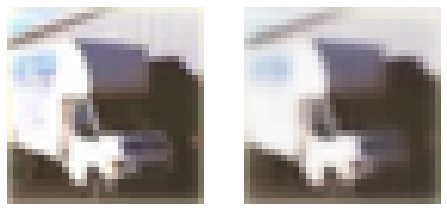

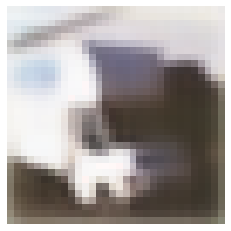

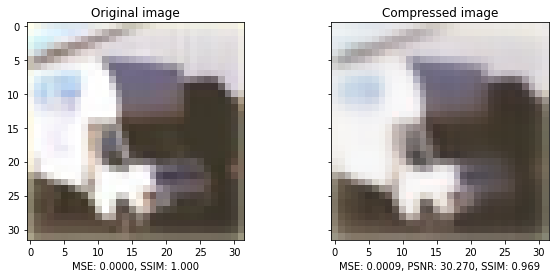

1.0000


In [ ]:
# test quality results with random images
# initialize the figure
fig = plt.figure("Images",figsize=(12,10))
index  = np.random.randint(len(X_test))
original = np.squeeze(X_test[index])
compressed = np.squeeze(decoded_imgs[index])
images = ("Original", original), ("Reconstructed", compressed)
# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image

	ax = fig.add_subplot(1, 3, i + 1)
	# ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")
# show the figure
plt.show()

plt.imshow(original)
plt.axis('off')
# plt.title( "An 8x8 Image block")
plt.savefig("Original", bbox_inches = 'tight',     pad_inches = 0)

# plt.savefig("Original", bbox_inches = 'tight',     pad_inches = 0)
plt.imshow(compressed)
plt.axis('off')
# plt.title( "An 8x8 Image block")

plt.savefig("Reconstructed", bbox_inches = 'tight',     pad_inches = 0, )

#compare image quality
compare_images(original, compressed, "Original vs. Reconstructed")

#calculate compression ratio
cr = "{:.4f}".format(compression_ratio(original, compressed))
print(cr)

In [ ]:
import math
def dft(input_img):
    rows = input_img.shape[0]
    cols = input_img.shape[1]
    output_img = np.zeros((rows,cols),complex)
    for m in range(0,rows):
        for n in range(0,cols):
            for x in range(0,rows):
                for y in range(0,cols):
                    output_img[m][n] += input_img[x][y] * np.exp(-1j*2*math.pi*(m*x/rows+n*y/cols))
    return output_img

In [ ]:
# convert image to jpeg
from PIL import Image
im = Image.open("Original.png")
rgb_img = im.convert('RGB')
rgb_img.save('image.jpg')


In [ ]:
calculate_mse(original,rgb_img)

Denoising Capability

In [ ]:
# add some gaussian noise 
def apply_gaussian_noise(X, sigma=0.1):
    noise = np.random.normal(loc=0.0, scale=sigma, size=X.shape)
    return X + noise

In [ ]:
for i in range(30):
    print("Epoch %i/30, Generating corrupted samples..."%(i+1))
    X_train_noise = apply_gaussian_noise(X_train)
    X_test_noise = apply_gaussian_noise(X_test)

    # We continue to train our model with new noise-augmented data
    autoencoder.fit(x=X_train_noise, y=X_train, epochs=1,
                    validation_data=[X_test_noise, X_test])

Epoch 1/30, Generating corrupted samples...
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0022 - accuracy: 0.7695 - val_loss: 0.0025 - val_accuracy: 0.7828
Epoch 2/30, Generating corrupted samples...
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0021 - accuracy: 0.7755 - val_loss: 0.0021 - val_accuracy: 0.7872
Epoch 3/30, Generating corrupted samples...
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0021 - accuracy: 0.7767 - val_loss: 0.0021 - val_accuracy: 0.7763
Epoch 4/30, Generating corrupted samples...
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0021 - accuracy: 0.7770 - val_loss: 0.0020 - val_accuracy: 0.7928
Epoch 5/30, Generating corrupted samples...
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0021 - accuracy: 0.7777 - val_loss: 0.0020 - val_accuracy: 0.7823
Epoch 6/30, Generating corrupted samples...
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0020

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

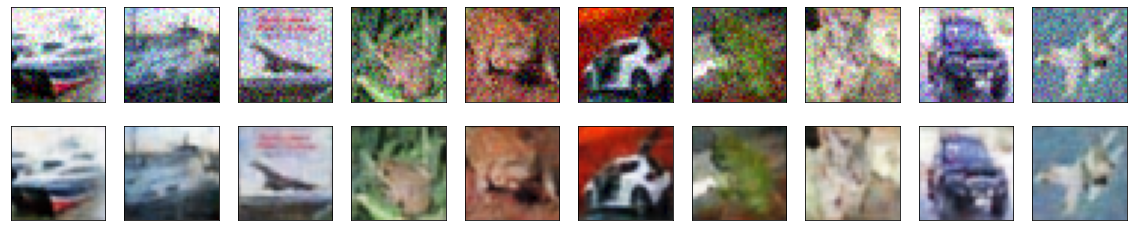

In [ ]:
X_test_noise = apply_gaussian_noise(X_test)
n = 10
decoded_imgs = autoencoder.predict(X_test_noise)
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_test_noise[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()